In [1]:
from ClassImplementation import GaussianMixtureModel,PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

print(f"Total samples: {X.shape[0]}")
print(f"Total features: {X.shape[1]}")

Total samples: 569
Total features: 30


In [2]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

=== Experiment 4: GMM after PCA ===

Training with 2 Principal Components:
  Covariance: full       | BIC: 5414.72
  Covariance: tied       | BIC: 5617.11
  Covariance: diag       | BIC: 5417.28
  Covariance: spherical  | BIC: 5407.88

Training with 5 Principal Components:
  Covariance: full       | BIC: 11261.32
  Covariance: tied       | BIC: 11825.56
  Covariance: diag       | BIC: 11439.33
  Covariance: spherical  | BIC: 11707.27

Training with 10 Principal Components:
  Covariance: full       | BIC: 17428.77
  Covariance: tied       | BIC: 18486.61
  Covariance: diag       | BIC: 17354.46
  Covariance: spherical  | BIC: 19841.23

Training with 15 Principal Components:
  Covariance: full       | BIC: 20847.81
  Covariance: tied       | BIC: 22402.64
  Covariance: diag       | BIC: 20261.63
  Covariance: spherical  | BIC: 26406.33

Training with 20 Principal Components:
  Covariance: full       | BIC: 20679.75
  Covariance: tied       | BIC: 22682.96
  Covariance: diag       | BIC: 

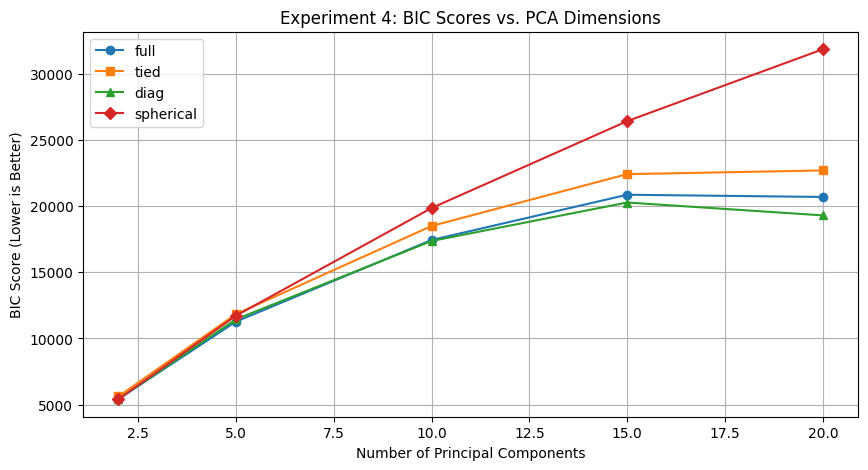


Visualizing Best Model (PCA=2, Covariance='full')...


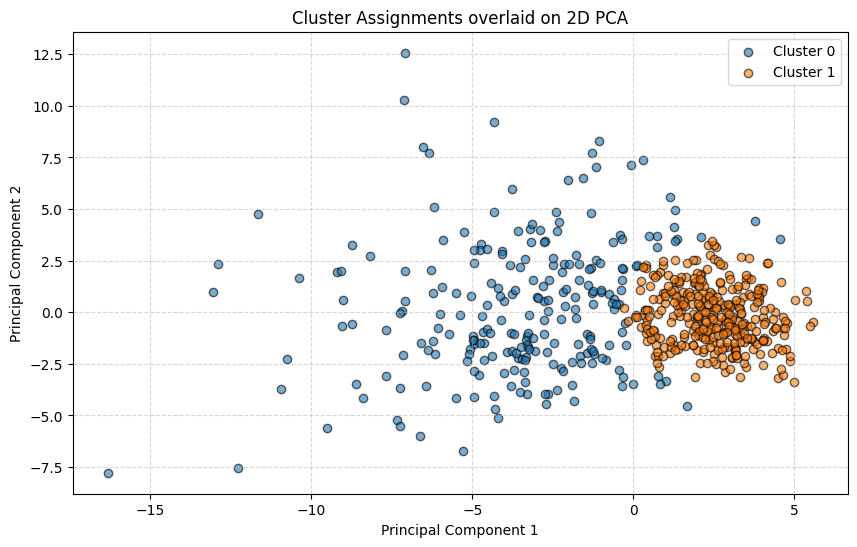

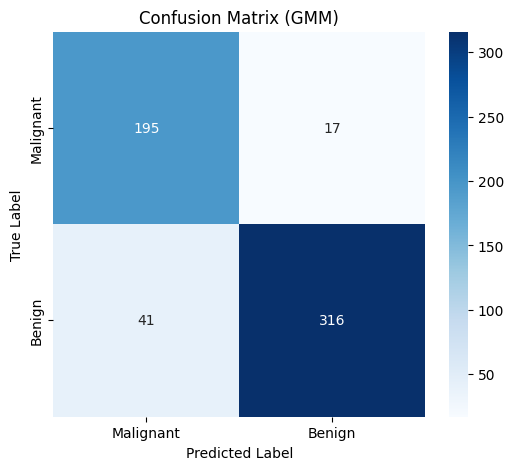


Analysis:
1. The BIC curve shows which covariance type balances complexity and fit best.
2. The Confusion Matrix quantifies how well the unsupervised clusters match the real diagnoses.


In [3]:
print("=== Experiment 4: GMM after PCA ===")

pca_components = [2, 5, 10, 15, 20]
cov_types = ['full', 'tied', 'diag', 'spherical']
bic_scores = {cov: [] for cov in cov_types}

for n_comp in pca_components:
    print(f"\nTraining with {n_comp} Principal Components:")
    
    pca = PCA(desired_dim=n_comp)
    pca.fit(X_std)
    X_pca = pca.transform(X_std)
    
    for cov_type in cov_types:
        gmm = GaussianMixtureModel(n_components=2, covariance_type=cov_type, max_iter=200)
        gmm.fit(X_pca)
        
        score = gmm.bic(X_pca)
        bic_scores[cov_type].append(score)
        
        print(f"  Covariance: {cov_type:10} | BIC: {score:.2f}")

plt.figure(figsize=(10, 5))
markers = ['o', 's', '^', 'D']
for i, cov_type in enumerate(cov_types):
    plt.plot(pca_components, bic_scores[cov_type], marker=markers[i], label=cov_type)
plt.title('Experiment 4: BIC Scores vs. PCA Dimensions')
plt.xlabel('Number of Principal Components')
plt.ylabel('BIC Score (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualizing Best Model (PCA=2, Covariance='full')...")
pca_viz = PCA(desired_dim=2)
pca_viz.fit(X_std)
X_viz = pca_viz.transform(X_std)

best_gmm = GaussianMixtureModel(n_components=2, covariance_type='full', max_iter=100)
best_gmm.fit(X_viz)
labels = best_gmm.predict(X_viz)

plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e']
for i in range(2):
    mask = (labels == i)
    plt.scatter(X_viz[mask, 0], X_viz[mask, 1], c=colors[i], 
                label=f'Cluster {i}', alpha=0.6, edgecolors='k')
plt.title('Cluster Assignments overlaid on 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

y_pred_aligned = np.zeros_like(labels)
for cluster in np.unique(labels):
    mask = (labels == cluster)
    if np.sum(mask) > 0:
        true_labels = y[mask]
        mode = np.bincount(true_labels).argmax()
        y_pred_aligned[mask] = mode

cm = np.zeros((2, 2), dtype=int)
for i in range(2):
    for j in range(2):
        cm[i, j] = np.sum((y == i) & (y_pred_aligned == j))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix (GMM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nAnalysis:")
print("1. The BIC curve shows which covariance type balances complexity and fit best.")
print("2. The Confusion Matrix quantifies how well the unsupervised clusters match the real diagnoses.")